# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here

mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))# distr.normal (estándar por defecto -sin parámetros-)
                                               # a cada elemento(int=>size) de sample_size le aplica la función

tests = dists.apply(lambda d: stats.normaltest(d))

tests


/home/ricardo/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0     (0.8265479308595651, 0.6614810350651066)
1    (0.11555728174222335, 0.9438588560882042)
2      (1.7443237978583548, 0.418046796686127)
3      (1.339233787454923, 0.5119046541090404)
4     (2.610381890810314, 0.27112076083920894)
dtype: object

#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here

# stats.normaltest -> This function tests the null hypothesis that a sample comes from a normal distribution
#                  -> Returns: statistic: the z-score; pvalue
# CONCLUSIÓN: Dado que el valor p es menor que el estadístico, se rechaza la hipótesis nula (distribución normal).

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

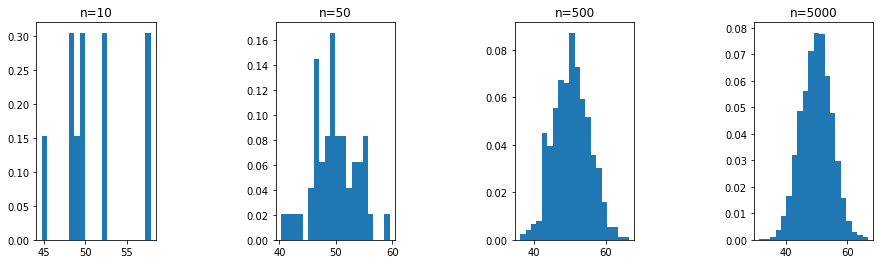

In [4]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)    # Set the width of the figure in inches

f.subplots_adjust(wspace=1)  
# Update the SubplotParams with kwargs (defaulting to rc when None) and update the subplot locations

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True) # dists=input, bins=20, density: If True, the first
    # element of the return tuple will be the counts normalized to form a probability density.
    # The return value is a tuple (n, bins, patches).
    # n: The values of the histogram bins.
    # bins: The edges of the bins.
    # patches: Silent list of individual patches used to create the histogram

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here

# según el Teorema Central del Límite si el tamaño de la muestra es suficientemente grande la distribución de la media 
# muestral se aproxima a una distribución normal, aunque la población no fuera normal.
# Y esto es lo que se observa en las gráficas. La distribución con n=10 es, claramente, no normal. Según aumenta el 
# tamaño de la muestra(n) evoluciona hacia una distribución normal.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

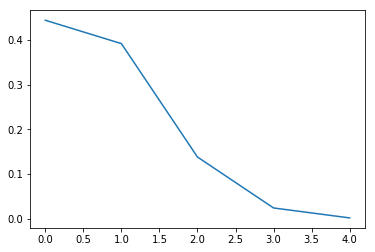

In [6]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15    # n = repeticiones independientes del experimento (5 people who wathched the video)
                  # p = probabilidad de éxito (click an Ad)

x = range(n)

dist = binom(n, p)    # Genera distribución binomial

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))
  # dist.pmf(x) computes the Probability Mass Function at values x in the case of discrete distributions

plt.show()

#### Explain what you observe from the plot above

In [7]:
# Your comment here

# La probabilidad de que, en uno de los cinco experimentos independientes, la persona que ve el vídeo haga clic en la 
# publicidad es de 0.4
# Esta probabilidad disminuye para el caso de que, en dos de los cinco experimentos, la persona haga el clic.
# Y, finalmente, la probabilidad de que en esos cinco experimentos el resultado positivo de dar al clic 
# lo hayan efectuado las cinco personas es mucho menor.

#### Now plot PMP with 50, 500, and 5000 visitors.

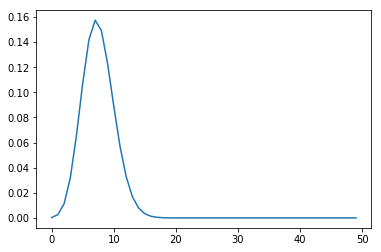

In [8]:
# Your code here
n, p = 50, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

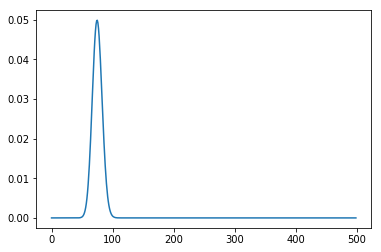

In [9]:
n, p = 500, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

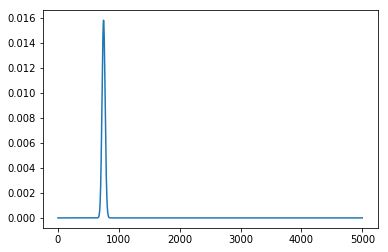

In [10]:
n, p = 5000, 0.15
x = range(n)
dist = binom(n, p)
fig, ax = plt.subplots(1, 1)
plt.plot(x, dist.pmf(x))
plt.show()

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [ ]:
# Your code here

#### What is the probability of getting 60 visits?

In [ ]:
# Your code here

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

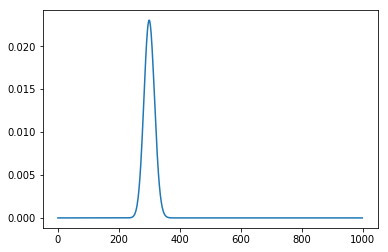

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)